# <center>The influence of education on developers</center>

I did not have formal university educated to be a developer, however I am now a developer. So I'm very interested in how education affects a developer. Today, let's find out what developers around the world think about this with the Developer Survey Results 2017 dataset.

## Initialize the environment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Some default config
DATA_FOLDER_PATH =  "../.."
SURVEY_PUBLIC = os.path.join(DATA_FOLDER_PATH, "survey_results_public.csv")
SURVEY_SCHEMA = os.path.join(DATA_FOLDER_PATH, "survey_results_schema.csv")

In [3]:
# Load result dataframe
results_df = pd.read_csv(SURVEY_PUBLIC)
results_df = results_df[results_df['Professional'].apply(lambda x:'Professional developer' in x)]
# Load schema dataframe
schema_df = pd.read_csv(SURVEY_SCHEMA)

In [4]:
def get_description(col_name, data = schema_df):
    """
    args:
    col_name: str - name of columns which want to knows it description
    data: pandas dataframe
    return:
    str - the description of columns in data
    """
    return data['Question'][data['Column']==col_name].values[0]

## 1 - Assessment of the importance of formal education

In [5]:
get_description("EducationImportant")

'Overall, how important has your formal schooling and education been to your career success?'

In [6]:
get_description('MajorUndergrad')

"Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"

In [7]:
keys = ['Very important', 'Important', 'Somewhat important', 'Not very important','Not at all important']

In [8]:
value_counted = results_df["EducationImportant"].value_counts()[keys].values
edu_important_percents = value_counted/sum(value_counted)
edu_important_percents

array([0.1591094 , 0.25095269, 0.26927853, 0.20530936, 0.11535003])

In [9]:
nearly_majors = ['Computer science or software engineering',
                'Computer engineering or electrical/electronics engineering',
                'Computer programming or Web development',
                'Information technology, networking, or system administration',
                'Management information systems']

In [10]:
nearly_df = results_df[results_df['MajorUndergrad'].apply(lambda x: x in nearly_majors)]
value_counted = nearly_df["EducationImportant"].value_counts()[keys].values
nearly_percents = value_counted/sum(value_counted)
nearly_percents

array([0.18220263, 0.2871523 , 0.2794687 , 0.18047531, 0.07070105])

In [11]:
other_df = results_df[results_df['MajorUndergrad'].apply(lambda x: x not in nearly_majors)]
value_counted = other_df.dropna(subset = ["MajorUndergrad"])["EducationImportant"].value_counts()[keys].values
other_percents = value_counted/sum(value_counted)
other_percents

array([0.12145215, 0.18459846, 0.27282728, 0.26226623, 0.15885589])

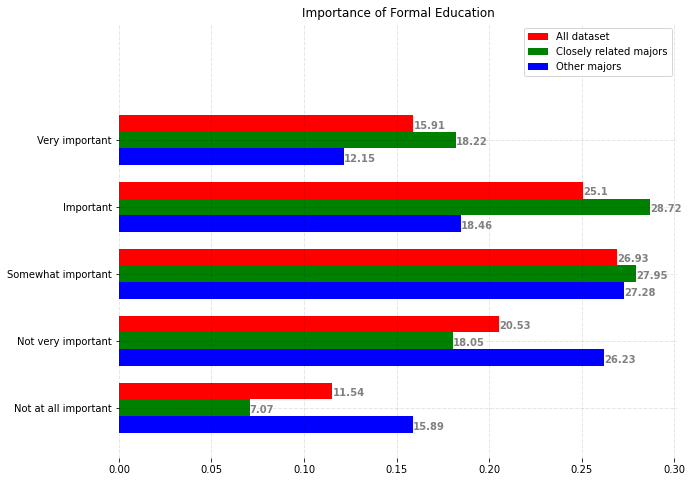

In [12]:
fig, ax = plt.subplots(figsize =(10, 8))

# Horizontal Bar Plot
width = 1/4
ind = np.arange(len(keys))
ax.barh(ind + 0*width, edu_important_percents, width, color='r', label='All dataset')
ax.barh(ind + 1*width, nearly_percents, width, color='g', label='Closely related majors')
ax.barh(ind + 2*width, other_percents, width, color='b', label='Other majors')

ax.set(yticks=ind + width, yticklabels=keys, ylim=[2*width-2, len(keys)])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add x, y gridlines
ax.grid(visible = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.2,
             str(round((i.get_width())*100, 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Importance of Formal Education',
             loc ='center', )
ax.legend()
# Show Plot
plt.show()  

In [13]:
12.15+18.46+27.28

57.89

## 2 - How people without formal education become professional developers?

In [14]:
get_description("EducationTypes")

'Outside of your formal schooling and education, which of the following have you done?'

In [15]:
answers = other_df.dropna(subset = ["MajorUndergrad",'EducationTypes'])
edu_types = set()
for x in answers["EducationTypes"].values:
    elem = x.split(";")
    for e in elem:
        edu_types.add(e.strip())

In [16]:
for t in edu_types:
    other_df[t] = other_df.dropna(subset = ['EducationTypes'])['EducationTypes'].apply(lambda x: 1 if t in x else 0)

/tmp/ipykernel_1699912/4218531787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df[t] = other_df.dropna(subset = ['EducationTypes'])['EducationTypes'].apply(lambda x: 1 if t in x else 0)


In [17]:
edu_type_counts = other_df[edu_types].dropna().sum()
percents = edu_type_counts/edu_type_counts.sum()
percents = percents.sort_values(ascending = False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


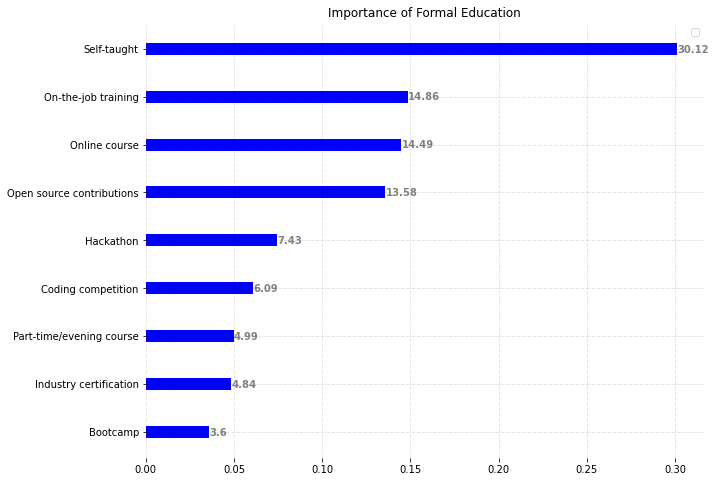

In [18]:

fig, ax = plt.subplots(figsize =(10, 8))

# Horizontal Bar Plot
ax.barh(percents.keys(), percents.values, width, color='b')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add x, y gridlines
ax.grid(visible = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.2,
             str(round((i.get_width())*100, 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Importance of Formal Education',
             loc ='center', )
ax.legend()
# Show Plot
plt.show()  

### 3 - Can we build a model to predict salary satisfaction of professional developers based on learning history?

In [19]:
def to_categorical(data, col_name):
    
    """
    arg:
        data: pandas dataframe
        col_name: str - name of columns
    return:
        small pandas dataframe with the answers is splited and convert to categorical type
    """
    answers = other_df.dropna(subset = [col_name])
    types = set()
    for x in answers[col_name].values:
        elem = x.split(";")
        for e in elem:
            types.add(e.strip())
    for t in types:
        data[t] = other_df.dropna(subset = [col_name])[col_name].apply(lambda x: 1 if t in x else 0)
    return data[types].fillna(0)

In [20]:
features = ['FormalEducation',
            'YearsProgram',
            'EducationTypes',
           'CompanySize',
           'CompanyType',
           'DeveloperType',
           'HaveWorkedLanguage',
           'HaveWorkedFramework',
           'HaveWorkedDatabase',
           'HaveWorkedPlatform']

dataset = other_df.dropna(subset = ["Overpaid"])
dataset.Overpaid = dataset.Overpaid.apply(lambda x:0 if x in ['Somewhat underpaid','Greatly underpaid'] else 1)

/home/azureuser/anaconda3/envs/vietvh9/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
X = pd.get_dummies(dataset[['FormalEducation',
                            'YearsProgram',
                           'CompanySize',
                           'CompanyType']],
                   dummy_na=True,
                   drop_first=True)
X = pd.concat([X,to_categorical(dataset,'DeveloperType')], axis = 1)
X = pd.concat([X,to_categorical(dataset,'EducationTypes')], axis = 1)
X = pd.concat([X,to_categorical(dataset,'HaveWorkedLanguage')], axis = 1)
X = pd.concat([X,to_categorical(dataset,'HaveWorkedFramework')], axis = 1)
X = pd.concat([X,to_categorical(dataset,'HaveWorkedDatabase')], axis = 1)
X = pd.concat([X,to_categorical(dataset,'HaveWorkedPlatform')], axis = 1)
y = dataset["Overpaid"]

/tmp/ipykernel_1699912/544041420.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[t] = other_df.dropna(subset = [col_name])[col_name].apply(lambda x: 1 if t in x else 0)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 42,stratify = y)
regr = LogisticRegression(max_iter = 1000)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.6117334905660378
0.583554376657825


## 4 - Summary